In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [2]:

#pip install plotly

In [3]:
dataset=pd.read_csv('CO2 Emission Preprocessed data.csv')

In [4]:
dataset

,Year,Country,CO2emission,Population,Growthrate,Percapita,Yearlychange,Gdp,Lifeexpectation
0,1950,Argentina,2.992119e+07,17017742.0,0.00,1.76,0.00,0.0,69.797449
1,1950,Australia,5.473865e+07,8177167.0,0.01,6.69,0.00,0.0,69.797449
2,1950,Brazil,1.965907e+07,53955359.0,0.00,0.36,0.00,0.0,69.797449
3,1950,Canada,1.541338e+08,13743069.0,0.00,11.22,0.00,0.0,69.797449
4,1950,China,7.883529e+07,543979233.0,0.00,0.14,0.00,0.0,69.797449
...,...,...,...,...,...,...,...,...,...
1723,2021,South Africa,4.359289e+08,59392255.0,0.01,7.34,0.02,0.0,69.797449
1724,2021,Spain,2.078091e+07,21773441.0,0.00,0.95,-4.25,0.0,69.797449
1725,2021,Thailand,2.784957e+08,71601103.0,0.00,3.89,0.41,0.0,69.797449
1726,2021,United Kingdom,3.467732e+08,67281039.0,0.00,5.15,6.29,0.0,69.797449


In [5]:
data={"Country":["Argentina","Australia","Brazil","Canada","China","Colombia","France","Germany",
                 "Ghana","Hungary","India","Italy","Japan","Mexico","Philippines","Poland",
                 "Romania","Rusia","Serbiya","South Africa","Spain","Thailand","United Kingdom","United Stats"]}
      

In [6]:
data1={"Country_Name":["ARG","AUS","BRA","CAN","CHI","COL","FRA","GER","GHA","HUN",
                      "IND","ITA","JPN","MEX","PHL","POL","ROM","RUS","SER","SAF",
                      "SPN","THA","UK","USA"]}

In [7]:
# create a dictionary mapping the old values to the new values
mapping = dict(zip(data["Country"], data1["Country_Name"]))

# replace the old values with the new values using the mapping
dataset["Country"] = dataset["Country"].replace(mapping)


In [8]:
dataset.head()

,Year,Country,CO2emission,Population,Growthrate,Percapita,Yearlychange,Gdp,Lifeexpectation
0,1950,ARG,29921192.0,17017742.0,0.00,1.76,0.0,0.0,69.797449
1,1950,AUS,54738652.0,8177167.0,0.01,6.69,0.0,0.0,69.797449
2,1950,BRA,19659072.0,53955359.0,0.00,0.36,0.0,0.0,69.797449
3,1950,CAN,154133760.0,13743069.0,0.00,11.22,0.0,0.0,69.797449
4,1950,CHI,78835290.0,543979233.0,0.00,0.14,0.0,0.0,69.797449


In [9]:
conversion_factor = 1 / 1000
dataset[' CO2emission'] = dataset[' CO2emission'] * conversion_factor
dataset[' Population']=dataset[' Population']* conversion_factor

In [10]:
dataset.head()

,Year,Country,CO2emission,Population,Growthrate,Percapita,Yearlychange,Gdp,Lifeexpectation
0,1950,ARG,29921.192,17017.742,0.00,1.76,0.0,0.0,69.797449
1,1950,AUS,54738.652,8177.167,0.01,6.69,0.0,0.0,69.797449
2,1950,BRA,19659.072,53955.359,0.00,0.36,0.0,0.0,69.797449
3,1950,CAN,154133.760,13743.069,0.00,11.22,0.0,0.0,69.797449
4,1950,CHI,78835.290,543979.233,0.00,0.14,0.0,0.0,69.797449


In [11]:
dataset.columns

Index(['Year', 'Country', ' CO2emission', ' Population', 'Growthrate',
       'Percapita', ' Yearlychange', ' Gdp', 'Lifeexpectation'],
      dtype='object')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             1728 non-null   int64  
 1   Country          1728 non-null   object 
 2    CO2emission     1728 non-null   float64
 3    Population      1728 non-null   float64
 4   Growthrate       1728 non-null   float64
 5   Percapita        1728 non-null   float64
 6    Yearlychange    1728 non-null   float64
 7    Gdp             1728 non-null   float64
 8   Lifeexpectation  1728 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 121.6+ KB


In [13]:
#dataset['Year']=pd.to_datetime(dataset['Year'])

# Highest CO2 Emission by Countries

In [15]:
def CO2EmissionMax():
    
    results = []

    # iterate through each unique country in the 'Country' column
    for country in dataset['Country'].unique():

        # find the maximum CO2 emissions for the current country
        co2_max = dataset.loc[dataset['Country'] == country, ' CO2emission'].max()
        data={"Country_Name":(country),"HighestCO2_Emission":(co2_max)}
        #print(results)
        # append the country name and its maximum CO2 emissions to the results list
        results.append(data)
        df = pd.DataFrame(results)
    return(df)



In [16]:
df=CO2EmissionMax()
df


,Country_Name,HighestCO2_Emission
0,ARG,1.917438e+05
1,AUS,4.163566e+05
2,BRA,5.579010e+05
3,CAN,5.935158e+05
4,CHI,1.147237e+07
5,COL,9.873096e+04
6,FRA,5.386852e+05
7,GER,1.117888e+06
8,GHA,2.131280e+04
9,HUN,9.056128e+04


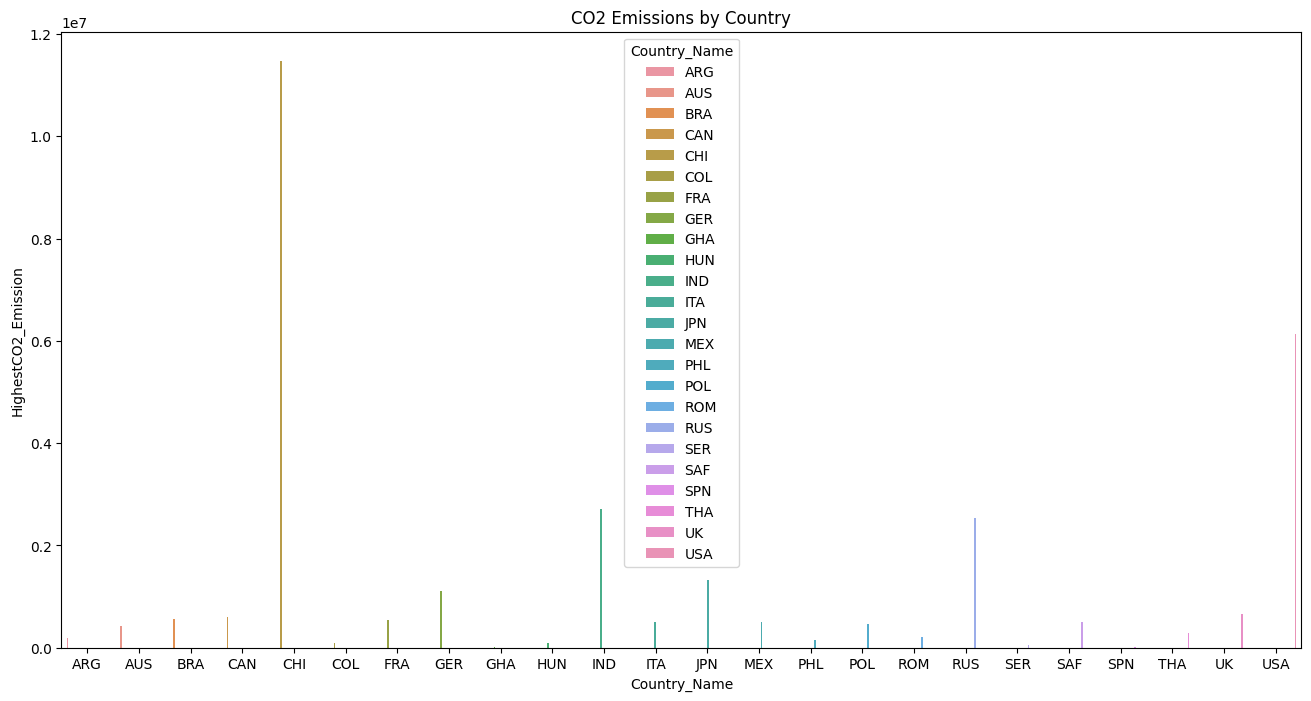

In [17]:
fig = plt.figure(figsize = (16, 8))
sns.barplot(data=df,x="Country_Name",y="HighestCO2_Emission",hue="Country_Name")
plt.title('CO2 Emissions by Country')
plt.xlabel("Country_Name")
plt.ylabel("HighestCO2_Emission")
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


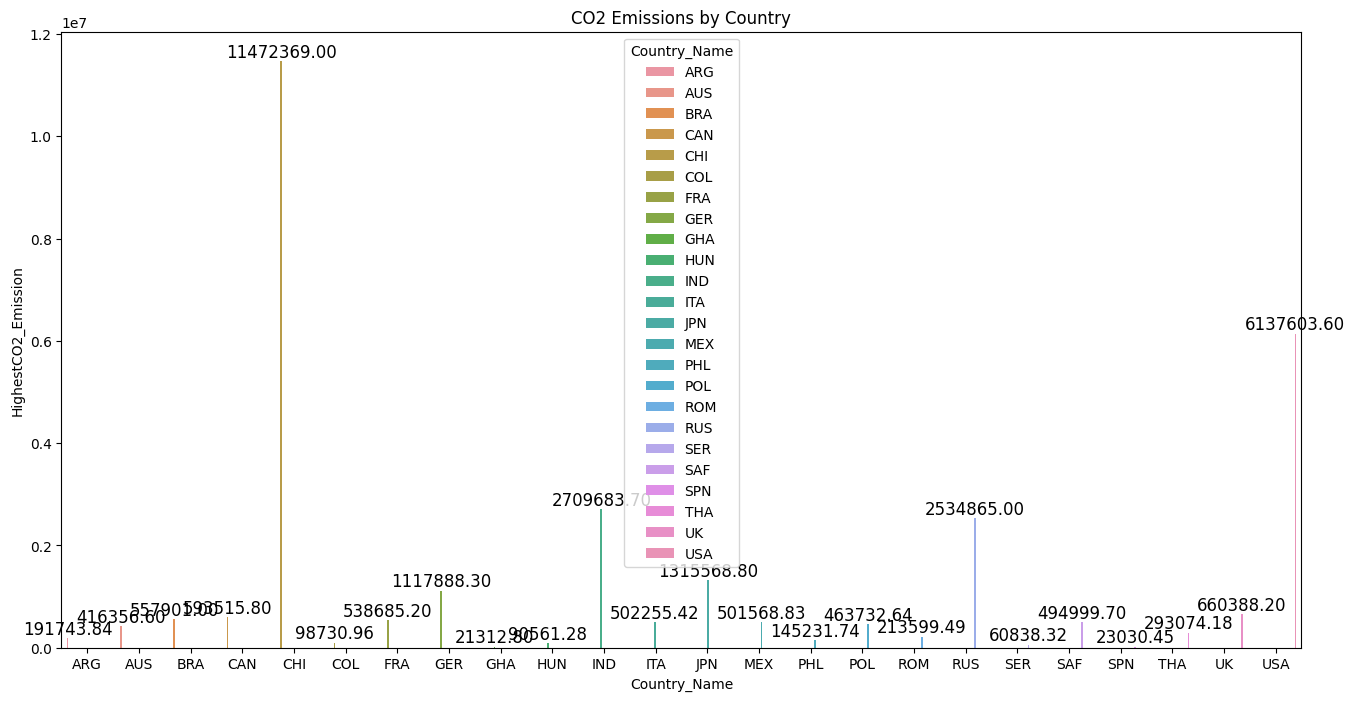

In [18]:
fig = plt.figure(figsize = (16, 8))
ax=sns.barplot(data=df,x="Country_Name",y="HighestCO2_Emission",hue="Country_Name",errwidth=0)
plt.title('CO2 Emissions by Country')
plt.xlabel("Country_Name")
plt.ylabel("HighestCO2_Emission")
for container in ax.containers:
    for rect in container:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., height, '%.2f' % height,
                fontsize=12, color='black', ha='center', va='bottom')


plt.show()

In [19]:
dataset.columns

Index(['Year', 'Country', ' CO2emission', ' Population', 'Growthrate',
       'Percapita', ' Yearlychange', ' Gdp', 'Lifeexpectation'],
      dtype='object')

# Analysis for India

In [20]:
def National():
    Name=input('Enter the Country name:')
    Nation=dataset[dataset['Country']== Name][['Year',' CO2emission',' Population','Growthrate','Percapita',
                                                 ' Yearlychange',' Gdp','Lifeexpectation']]
    Nation
    return(Nation)

In [21]:

India=National()


Enter the Country name:IND


In [22]:
India.head()

,Year,CO2emission,Population,Growthrate,Percapita,Yearlychange,Gdp,Lifeexpectation
10,1950,61102.630,357021.100,0.00,0.17,0.00,0.0,69.797449
34,1951,64022.190,364922.360,0.02,0.18,4.78,0.0,69.797449
58,1952,67426.220,372997.188,0.02,0.18,5.32,0.0,69.797449
82,1953,68704.904,381227.705,0.02,0.18,1.90,0.0,69.797449
106,1954,72413.710,389731.406,0.02,0.19,5.40,0.0,69.797449


In [70]:
def YearVSCO2Emission(India):
    sns.lineplot(data=India, x='Year', y=' CO2emission',)
    plt.show()
    return(plt.show())

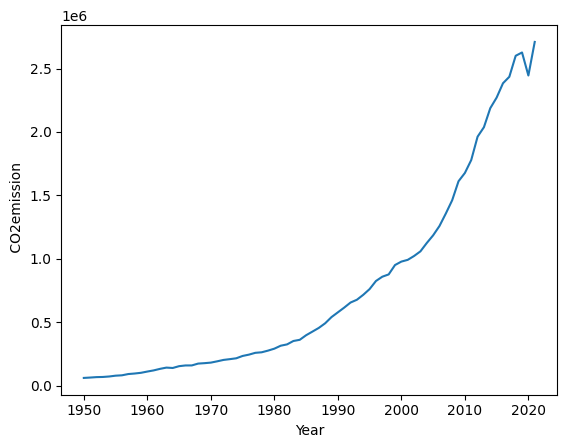

In [72]:
YearVSCO2Emission(India)

In [73]:
def YearVSGdp(India):
    sns.lineplot(data=India, x='Year', y=' Gdp',)
    plt.show()
    return(plt.show())

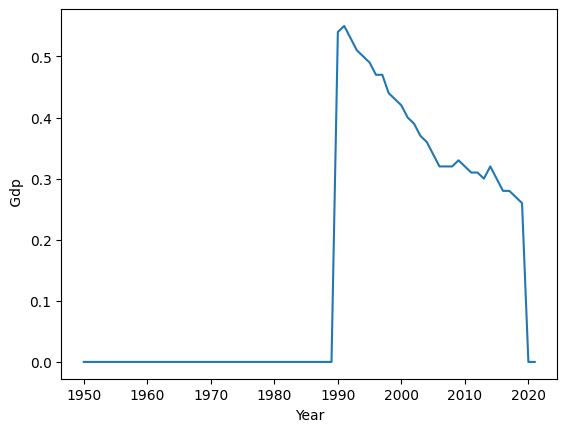

In [74]:
YearVSGdp(India)

In [75]:
def YearVSPercapita(India):
    sns.lineplot(data=India, x='Year', y='Percapita')
    plt.show()
    return(plt.show())

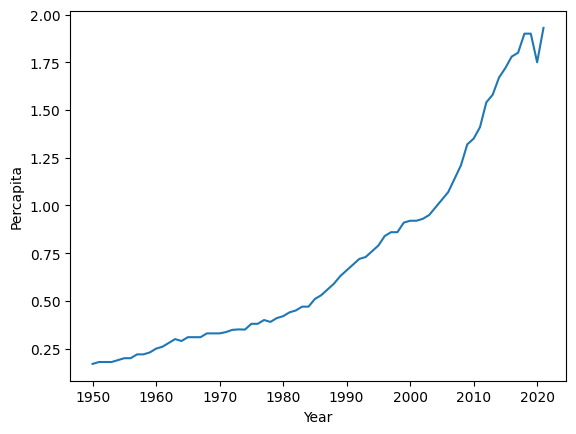

In [76]:
YearVSPercapita(India)

In [79]:
def GdpVSCO2Emission(India):
    sns.lineplot(data=India, x=' Gdp', y=' CO2emission')
    plt.show()
    return(plt.show())

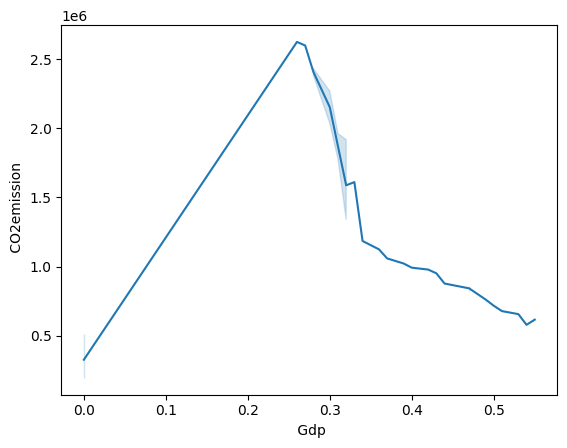

In [80]:
GdpVSCO2Emission(India)

In [81]:
def CO2VSFrq(India):
    plt.hist(India[' CO2emission'], bins=20)
    plt.xlabel(' CO2emission')
    plt.ylabel('Frequency')
    plt.show()
    return(plt.show())

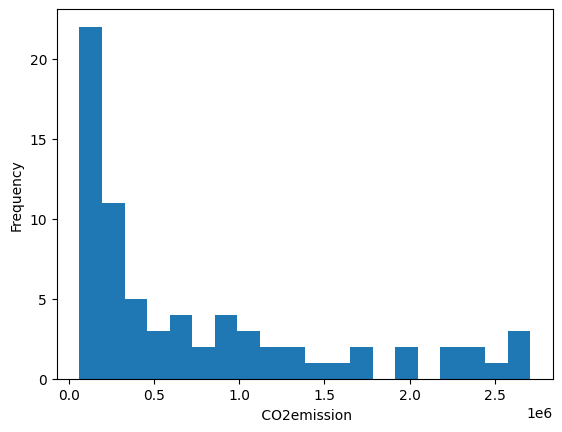

In [82]:
CO2VSFrq(India)

In [112]:
def TopFiveYears(India):
    # sort the data by CO2 emission in descending order and select the top 5 rows
    top_five_years = India.sort_values(' CO2emission', ascending=False).head(5)
    return(top_five_years)



In [116]:
TopFiveYears(India)
TopEmissions=TopFiveYears(India)
TopEmissions

,Year,CO2emission,Population,Growthrate,Percapita,Yearlychange,Gdp,Lifeexpectation
1714,2021,2709683.7,1407563.842,0.01,1.93,10.82,0.00,69.797449
1666,2019,2626459.4,1383112.050,0.01,1.90,1.00,0.26,69.660000
1642,2018,2600446.5,1369003.306,0.01,1.90,6.80,0.27,69.420000
1690,2020,2445012.0,1396387.127,0.01,1.75,-6.91,0.00,69.890000
1618,2017,2434868.0,1354195.680,0.01,1.80,2.14,0.28,69.170000


In [117]:
def plot_top_emissions(TopEmissions):
    fig = plt.figure(figsize=(10,6))
    sns.barplot(data=TopEmissions, x='Year', y=' CO2emission', hue=' CO2emission')
    plt.title('CO2 Emission Maximum ')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions')
    plt.show()
    return(plt.show())

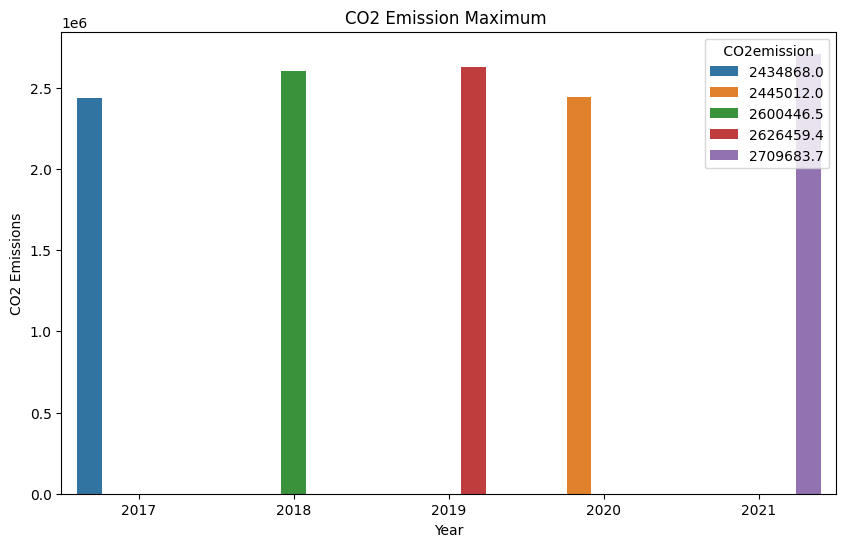

In [118]:
plot_top_emissions(TopEmissions)

# Analysis for France

In [101]:
France=National()

Enter the Country name:FRA


In [102]:
France.head()

,Year,CO2emission,Population,Growthrate,Percapita,Yearlychange,Gdp,Lifeexpectation
6,1950,202428.86,41842.355,0.00,4.84,0.00,0.0,69.797449
30,1951,228915.86,42196.657,0.01,5.42,13.08,0.0,69.797449
54,1952,227188.02,42542.401,0.01,5.34,-0.75,0.0,69.797449
78,1953,214738.74,42883.297,0.01,5.01,-5.48,0.0,69.797449
102,1954,226568.03,43225.643,0.01,5.24,5.51,0.0,69.797449


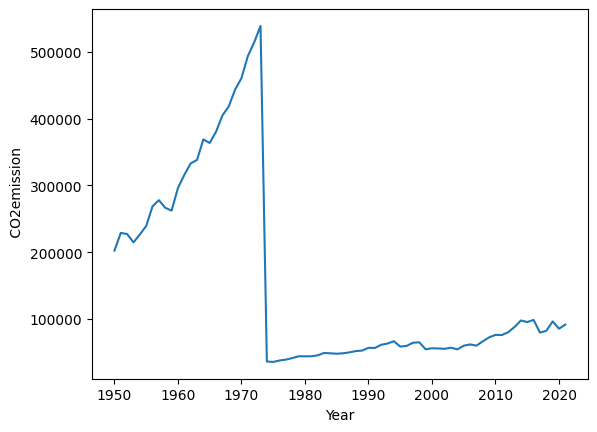

In [103]:
YearVSCO2Emission(France)

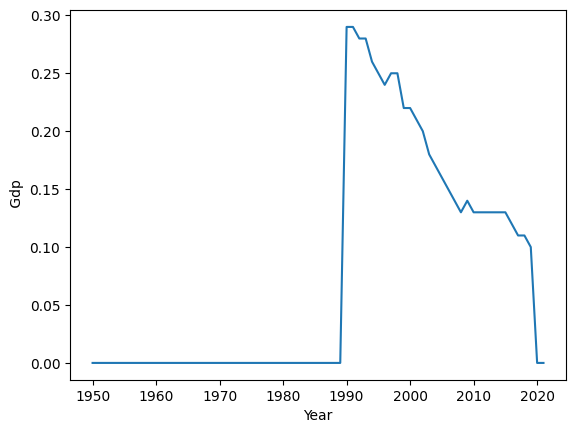

In [104]:
YearVSGdp(France)

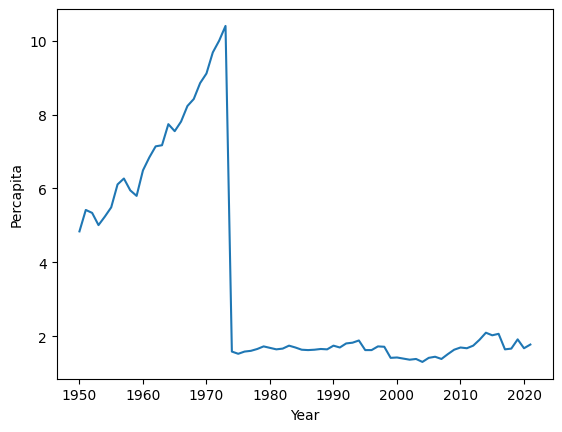

In [105]:
YearVSPercapita(France)

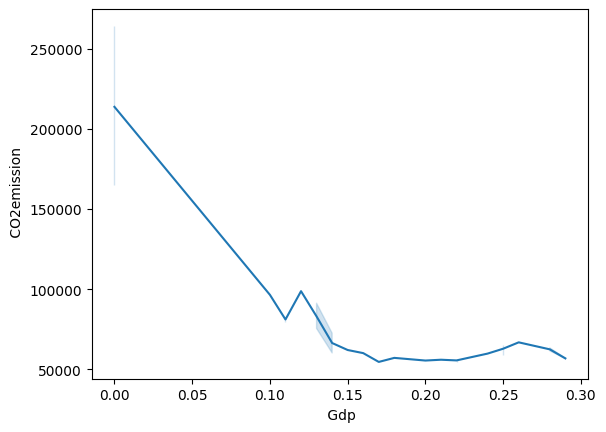

In [106]:
GdpVSCO2Emission(France)

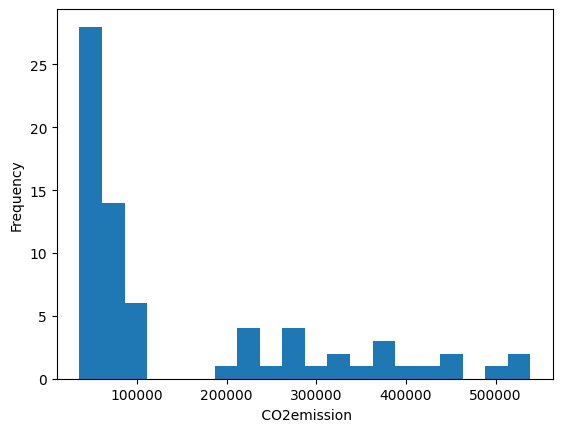

In [107]:
CO2VSFrq(France)

In [119]:
TopFiveYears(France)
TopEmissions=TopFiveYears(France)
TopEmissions

,Year,CO2emission,Population,Growthrate,Percapita,Yearlychange,Gdp,Lifeexpectation
558,1973,538685.20,51814.075,0.01,10.396503,4.81,0.0,72.36
534,1972,513987.30,51410.363,0.01,9.997737,4.17,0.0,72.11
510,1971,493421.63,50970.698,0.01,9.680496,7.16,0.0,71.91
486,1970,460449.15,50523.586,0.01,9.110000,3.84,0.0,71.66
462,1969,443401.40,50087.049,0.01,8.850000,6.01,0.0,71.46


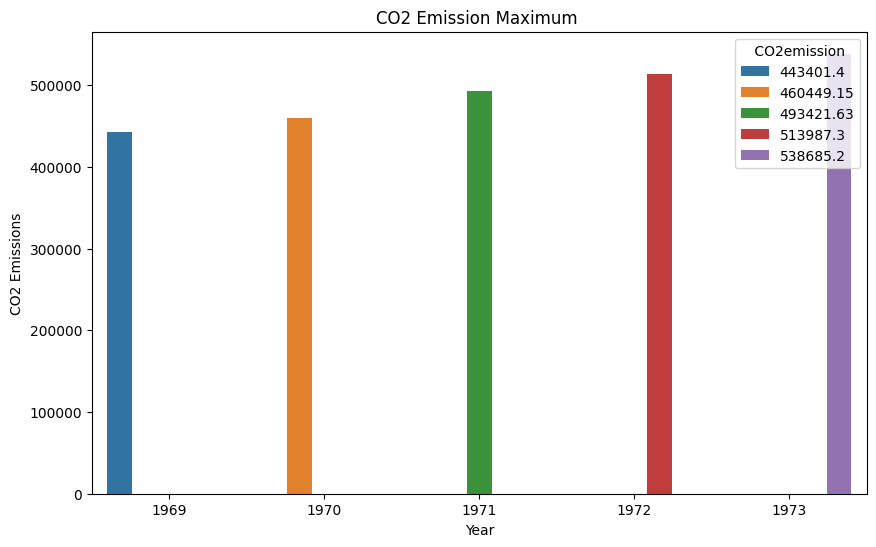

In [120]:
plot_top_emissions(TopEmissions)

# Analysis for the year 2000

In [43]:
def Emit():
    Y=int(input('Enter the year:'))
    N=dataset[dataset['Year']== Y][['Year','Country',' CO2emission',' Population','Growthrate','Percapita',
                                    ' Yearlychange',' Gdp','Lifeexpectation']]
    N
    return(N)

In [44]:
Yr=Emit()


Enter the year:2000


In [131]:
Yr.head()

,Year,Country,CO2emission,Population,Growthrate,Percapita,Yearlychange,Gdp,Lifeexpectation
1200,2000,ARG,142358.35,37070.774,0.01,3.84,-3.35,0.31,73.58
1201,2000,AUS,349635.50,19017.963,0.02,18.38,1.79,0.67,79.23
1202,2000,BRA,340183.00,175873.720,0.01,1.93,3.95,0.20,70.12
1203,2000,CAN,566690.40,30683.313,0.01,18.47,4.16,0.57,79.14
1204,2000,CHI,3644464.00,1264099.069,0.01,2.88,2.58,0.91,71.40


# CO2 Emission by countries in the year 2000

# Top 10 Countries

In [125]:

def CO2emissions_by_Country(Yr):
    # Sort by CO2 emissions and select top countries
    top_countries = Yr.sort_values(' CO2emission', ascending=False).head(10)
    # Create bar plot
    fig = plt.figure(figsize=(10,6))
    sns.barplot(data=top_countries, x='Country', y=' CO2emission', hue='Country')
    plt.title(f'CO2 Emissions by Country')
    plt.xlabel('Country')
    plt.ylabel('CO2 Emissions')
    plt.show()
    return( plt.show())


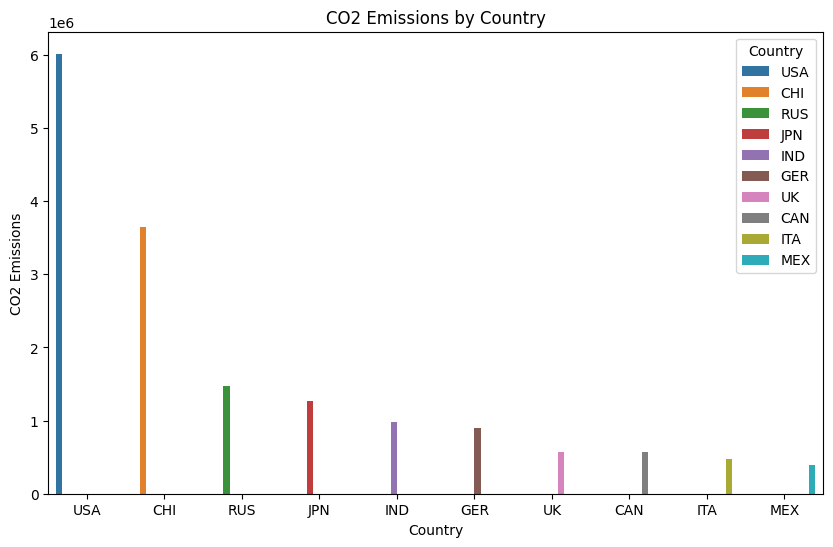

In [126]:
CO2emissions_by_Country(Yr)

# CO2 Emissions by Countries in the year 2000

In [127]:
def Emissionbycountries(Yr):
    fig = plt.figure(figsize = (16, 8))
    sns.barplot(data= Yr,x='Country',y=' CO2emission',hue='Country')
    plt.title('CO2 Emissions by Country in the year 2000')
    plt.xlabel("Country_Name")
    plt.ylabel("CO2_Emission")
    plt.show()
    return(plt.show())

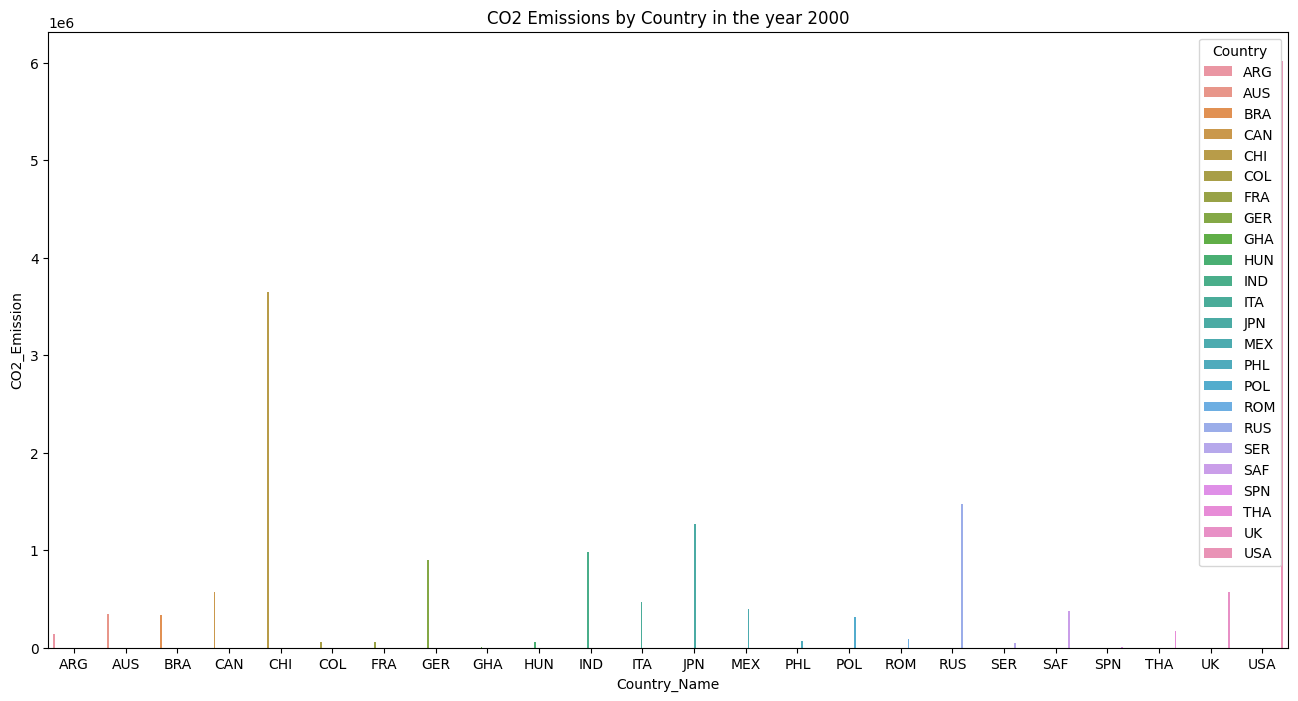

In [128]:
Emissionbycountries(Yr)

In [132]:
Yr.columns

Index(['Year', 'Country', ' CO2emission', ' Population', 'Growthrate',
       'Percapita', ' Yearlychange', ' Gdp', 'Lifeexpectation'],
      dtype='object')

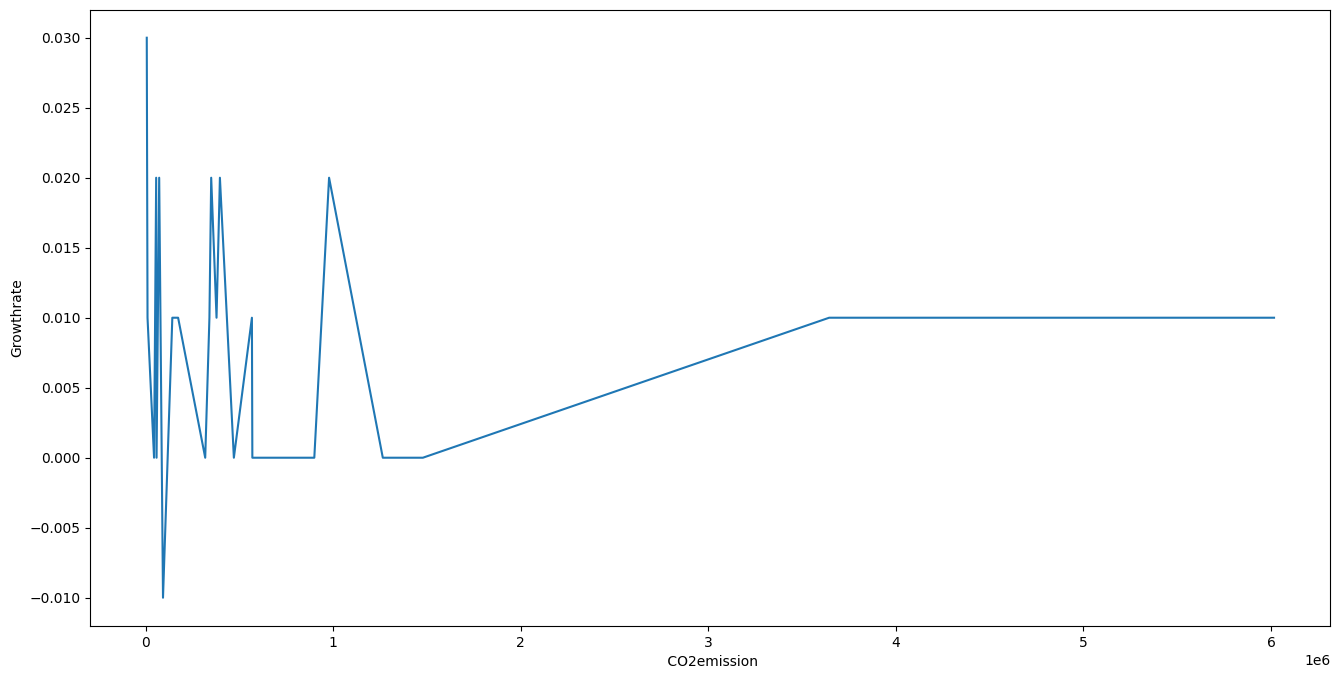

In [134]:
fig = plt.figure(figsize = (16, 8))
sns.lineplot(data=Yr, x=' CO2emission', y='Growthrate')
#sns.scatterplot(data=Yr, x='Year', y=' CO2emission', hue=' CO2emission')
plt.xlabel(' CO2emission')
plt.ylabel('Growthrate')
plt.show()

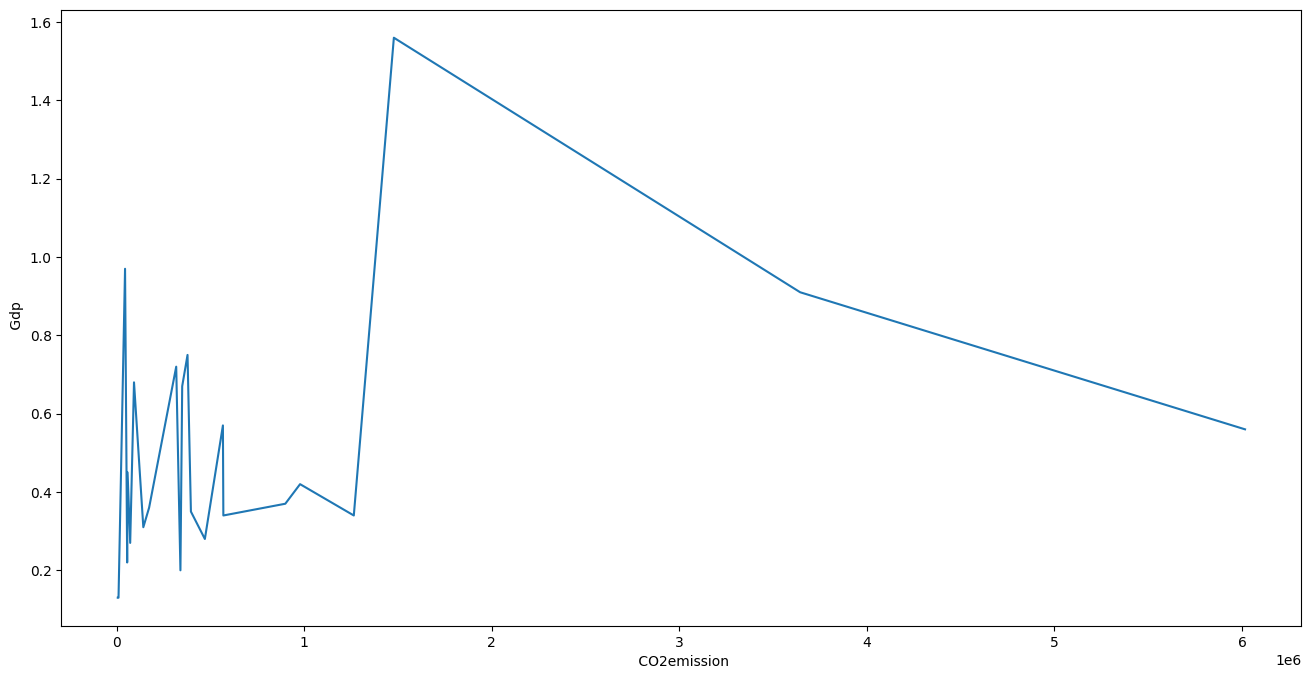

In [144]:
fig = plt.figure(figsize = (16, 8))
sns.lineplot(data=Yr, x=' CO2emission', y=' Gdp')
#sns.scatterplot(data=Yr, x='Year', y=' CO2emission', hue=' CO2emission')
plt.xlabel(' CO2emission')
plt.ylabel(' Gdp')
plt.show()

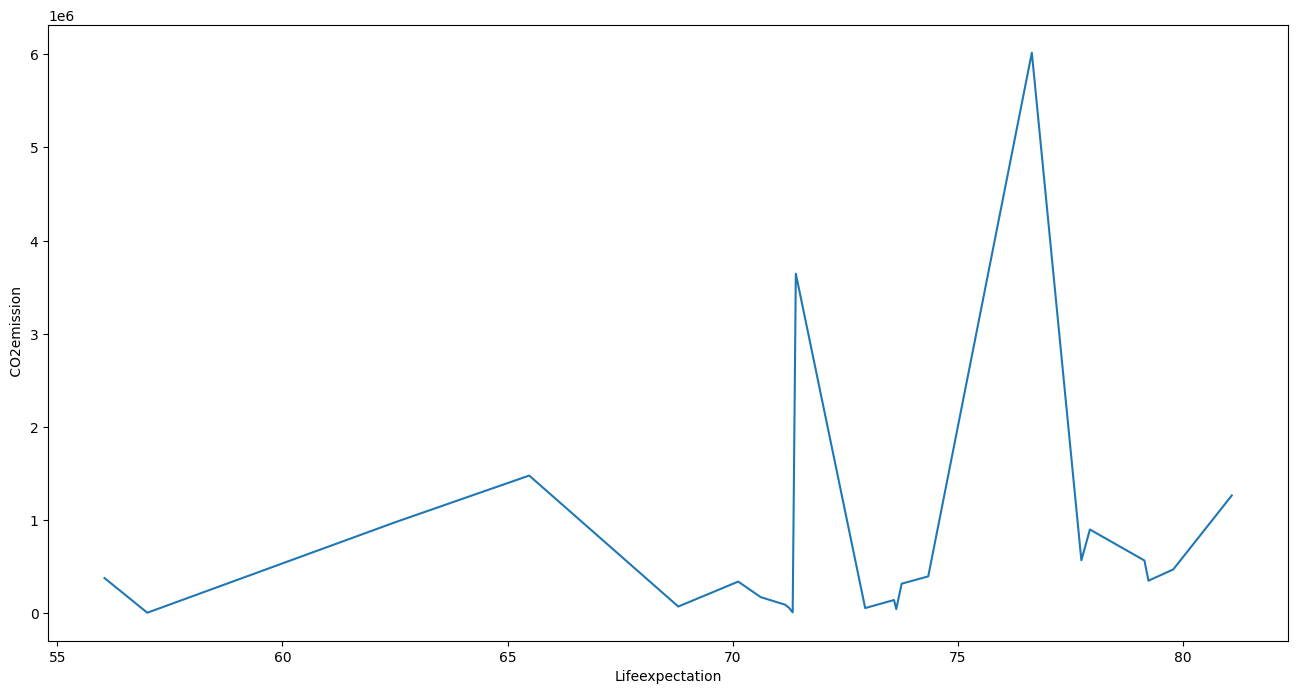

In [138]:
fig = plt.figure(figsize = (16, 8))
sns.lineplot(data=Yr, x='Lifeexpectation', y=' CO2emission')
#sns.scatterplot(data=Yr, x='Year', y=' CO2emission', hue=' CO2emission')
plt.xlabel('Lifeexpectation')
plt.ylabel(' CO2emission')
plt.show()

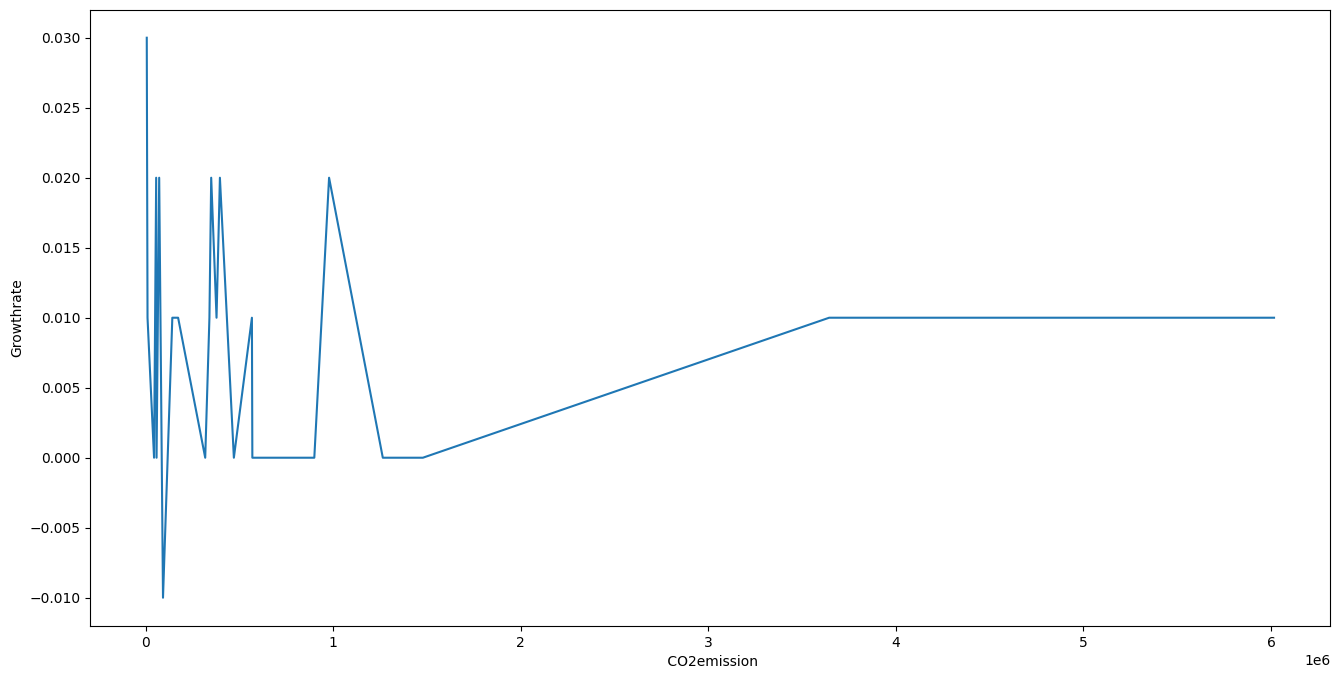

In [146]:
fig = plt.figure(figsize = (16, 8))
sns.lineplot(data=Yr, x=' CO2emission', y='Growthrate')
#sns.scatterplot(data=Yr, x='Year', y=' CO2emission', hue=' CO2emission')
plt.xlabel(' CO2emission')
plt.ylabel('Growthrate')
plt.show()